# 데이터 소개

타이타닉 데이터를 사용하는 이유 : 데이터셋의 크기와 상관관계를 분석할 변수의 개수와 의미가 적절하다.

## 변수 설명
### survived : 생존 여부 (0 = 사망; 1 = 생존) </br>
### pclass : 승객 등급 (1 = 1등급; 2 = 2등급; 3 = 3등급) </br>
### name : 승객 이름 </br>
### sex : 승객 성별 </br>
### age : 승객 나이 </br>
### sibsp : 함께 탑승한 형제/배우자 수 </br>
### parch :	함께 탑승한 부모/자녀 수 </br>
### ticket : 티켓 번호 </br> 
### fare : 승객이 지불한 요금 </br>
### cabin : 객실 번호 </br>
### embarked : 탑승 항구 (C = 셰르부르; Q = 퀸즈타운; S = 사우샘프턴) </br>

## 데이터의 종류

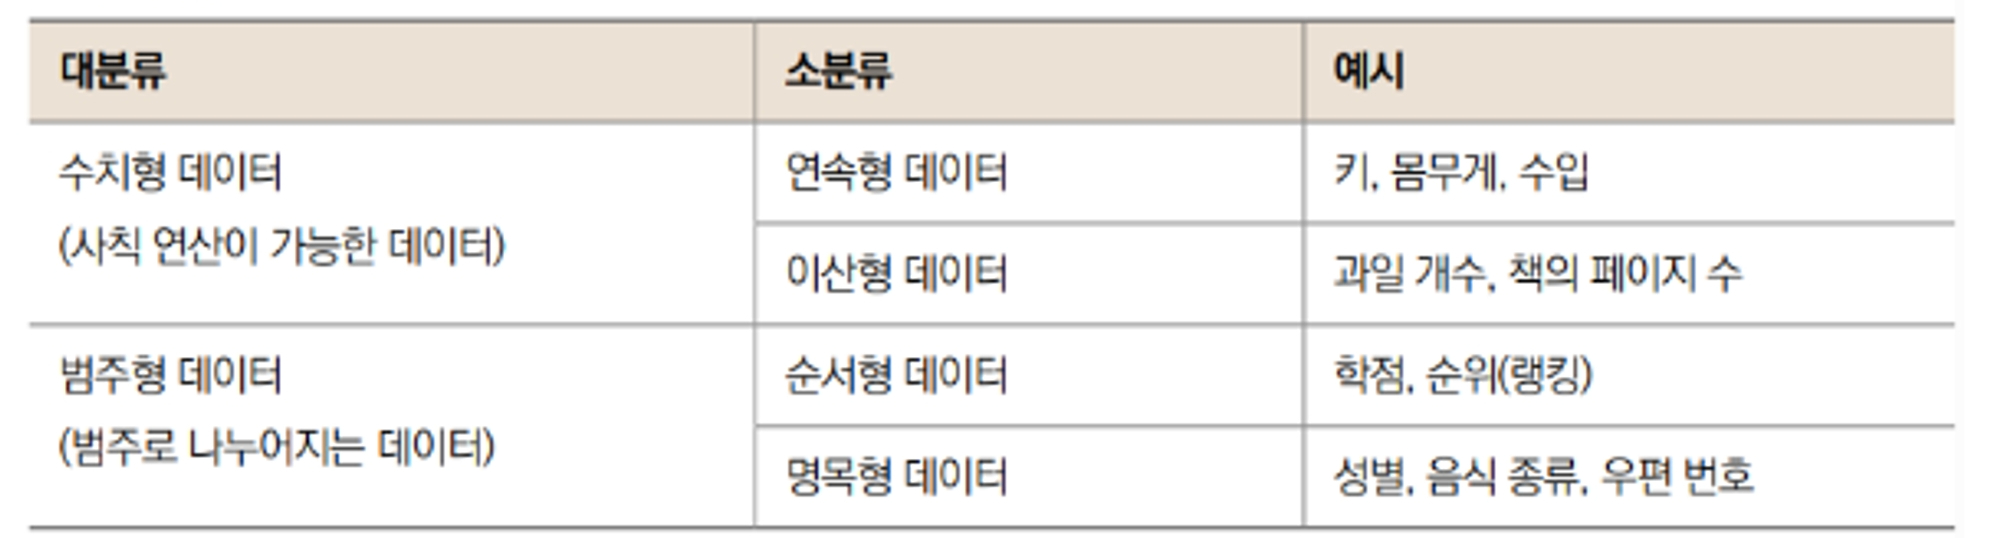

## 시각화 차트 종류

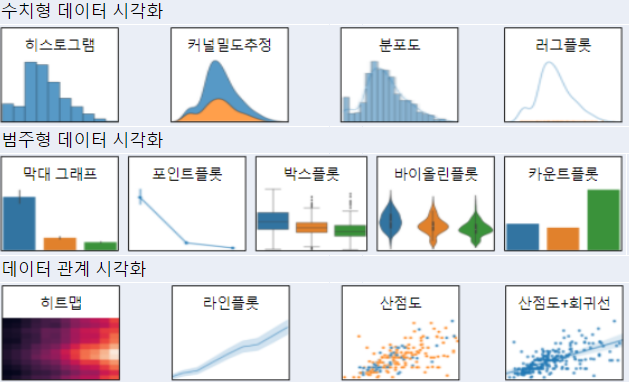

### 수치형 데이터 시각화
- 히스토그램 : 수치형 데이터의 구간별 빈도수
- 커널밀도추정 : 히스토그램을 매끄럽게 곡선으로 연결한 그래프
- 분포도 : 수치형 데이터 하나의 분포를 나타내는 그래프
- 러그 플롯 : 주변 분포를 나타내는 그래프
### 범주형 데이터 시각화
- 막대 그래프 : 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용
- 포인트 플롯 : 막대그래프와 모양만 다를 뿐 동일한 정보를 제공(여러 그래프를 비교할 때 가시성이 좋음)
- 박스 플롯 : 막대그래프나 포인트 플롯보다 더 많은 정보를 제공(최솟값, 제1사분위 수, 제 2사분위 수, 제 3사분위 수, 최댓값) <br>
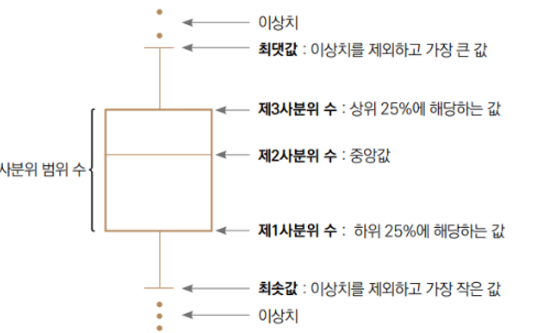
- 바이올린 플롯 : 박스플롯과 커널 밀도추정 함수 그래프를 합쳐놓은 그래프
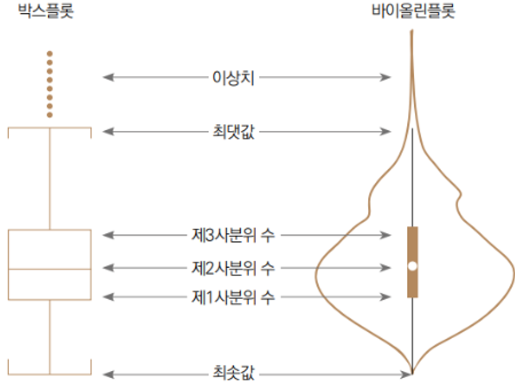
- 카운트 플롯 : 범주형 데이터의 개수를 확인할 때 사용
- 파이 그래프 : 범주형 데이터의 비율을 알아볼 때 사용
### 데이터 관계 시각화
- 히트맵 : 데이터 간 관계를 색상으로 표현한 그래프
- 라인 플롯 : 두 수치형 데이터 사이의 관계를 나타날 때 사용
- 산점도 : 두 데이터의 관계를 점으로 표현하는 그래프
- 산점도+회귀선 : 산점도와 선형 회귀선을 그려 전반적인 상관관계를 파악하기 좀 더 쉬움

# 가설 설정 (타이타닉 영화를 기반으로)

#### 가설 1: 성별(Sex)이 생존률에 유의미한 영향을 미친다.
타이타닉 사고 당시, 여성의 생존율이 남성보다 훨씬 높았다는 것은 구조 우선 순위에서 여성에게 유리한 조건이 있었기 때문

#### 가설 2: 좌석 등급(Pclass)이 생존률에 유의미한 영향을 미친다.
높은 등급의 좌석에 위치한 승객들이 구조 우선 순위에서 더 유리한 조건에 있었을 수 있음

#### 가설 3: 나이(Age)가 생존률에 유의미한 영향을 미친다.
나이가 어린 승객들이 구조 우선 순위에서 더 유리한 위치에 있었을 수 있음

#### 가설 4: 운임(Fare)이 생존률에 유의미한 영향을 미친다.
더 높은 운임을 지불한 승객일수록 더 안전한 위치에 있었거나 구조될 가능성이 높았을 수 있음


# 분석과정

1. EDA (Exploratory Data Analysis)
2. 데이터 전처리 (Feature Engineering, Data Cleansing)
3. 데이터 모델링 (ML modeling) with 앙상블 기법
4. 모델 평가 (Model Evaluation)

# 1. EDA

## Package Import

In [66]:
# 필수 라이브러리 임포트
import numpy as np  # 수치 연산을 위한 라이브러리
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import seaborn as sns  # 고급 시각화를 위한 라이브러리 (Matplotlib 기반)

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings('ignore')  # 경고 메시지를 괄호 안에 입력


## titanic data 불러오기

In [67]:
data = pd.read_csv("./data/titanic.csv")


## Data head 확인

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# 데이터 사이즈 확인
data.shape

(891, 12)

In [70]:
# 데이터 통계 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
# 데이터 타입 및 결측 값 확인
data.info()
# object는 문자열 또는 명목형 데이터임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


범주형(범주로 나뉨)-순서형&명목형, 수치형(사칙연산 가능)-이산형&연속형 변수들을 확인할 수 있다. </br>
알고 싶은 결과(Survived 여부)를 Y로 설정하여 EDA(탐색적 데이터 분석)을 시작한다.

## 데이터 결측값 확인

In [72]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(EDA) Embarked에 일부 결측치, Cabin과 Age에도 결측치가 있음을 알 수 있다.

## Survived(Y)에 대해 알아보자

In [73]:
data[['Survived']].groupby(['Survived']).value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

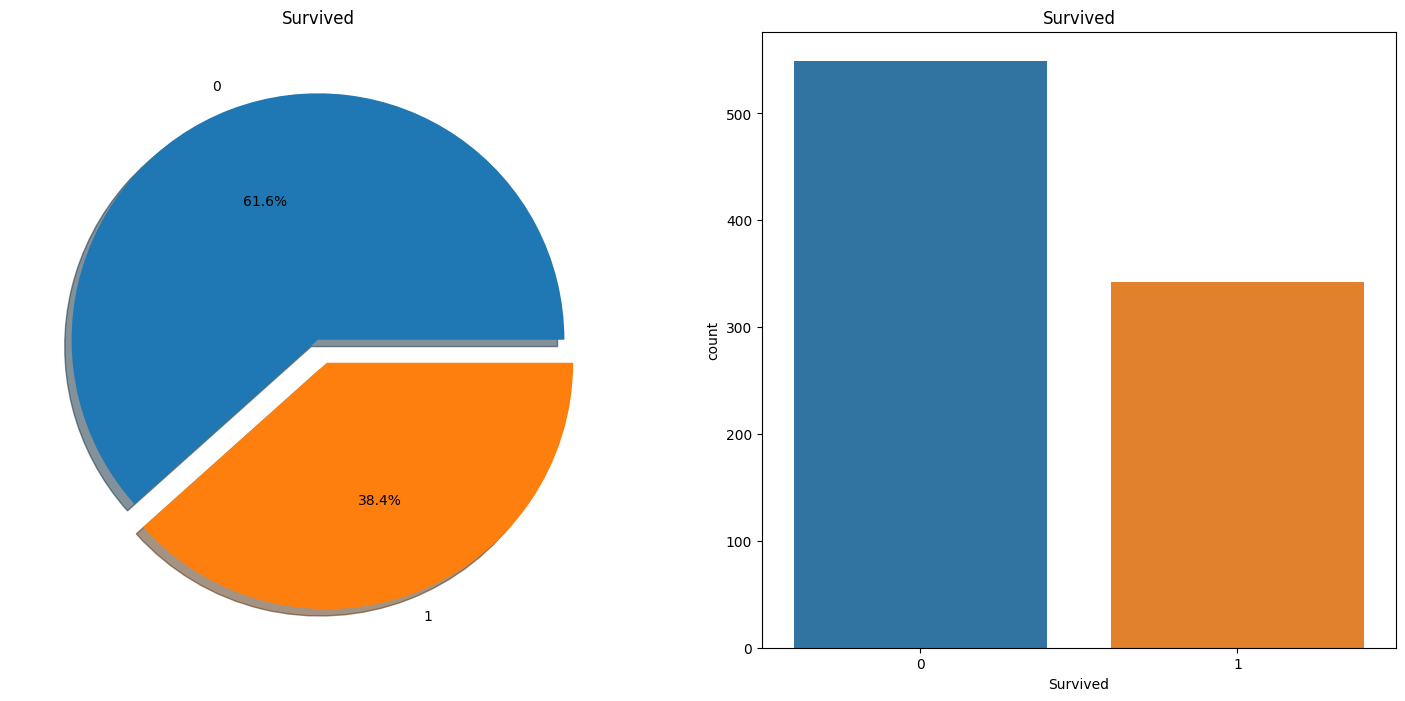

In [74]:
import matplotlib.colors as mcolors

# 서브플롯 생성: 1행 2열의 서브플롯, 전체 크기는 18x8 인치
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 서브플롯: 원형 차트
# 'Survived' 컬럼의 값들을 세어서 원형 차트로 표현
colors = ['#1f77b4', '#ff7f0e']  # 원하는 색상 목록
data['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],  # 두 번째 파이 조각을 약간 분리
    autopct='%1.1f%%',  # 각 파이 조각의 비율을 표시
    ax=ax[0],  # 첫 번째 서브플롯에 그리기
    shadow=True,  # 그림자 효과 추가
    colors=colors  # 색상 설정
)
ax[0].set_title('Survived')  # 차트 제목 설정
ax[0].set_ylabel('')  # y축 레이블 제거

# 두 번째 서브플롯: 막대 그래프
# 'Survived' 컬럼의 값들을 세어서 막대 그래프로 표현
sns.countplot(x='Survived', data=data, ax=ax[1], palette=colors)
ax[1].set_title('Survived')  # 차트 제목 설정

# 차트 표시
plt.show()


(EDA) 약 62%가 Survived = 0 (사망), 38% 정도가 Survived = 1 (생존) 했음을 알 수 있다. </br>

참고로 Python의 포맷 문자열은 다음과 같이 표시한다. </br>
%1.0f%%: 소수점 없이 정수 형태로 비율을 표시 (예: 20%) </br>
%1.1f%%: 소수점 첫째 자리까지 비율을 표시 (예: 20.0%) </br>
%1.2f%%: 소수점 둘째 자리까지 비율을 표시 (예: 20.00%) </br>

추가로, </br>
앞의 %는 포맷 문자열의 시작을 의미한다. </br>
뒤의 %%는 실제 기호 '5'를 표시한다. </br>

## Sex와 Survived의 관계 (가설1)

In [75]:
data[['Sex', 'Survived']].groupby(['Sex']).value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [76]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


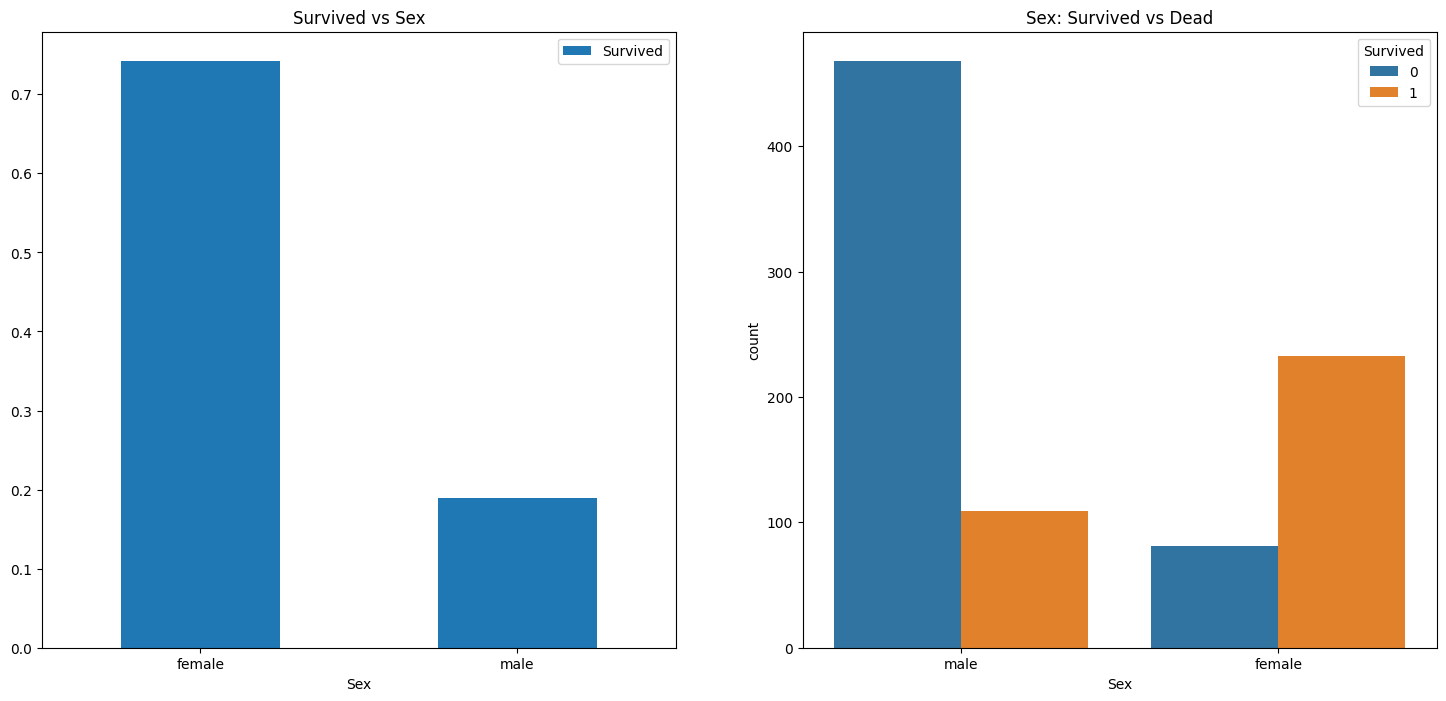

In [77]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 서브플롯: 성별에 따른 생존율 막대 그래프
# 'Sex'와 'Survived' 컬럼을 그룹화하여 생존율의 평균을 계산하고 막대 그래프로 표현
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')  
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)  # x축 레이블을 가로로 설정

# 두 번째 서브플롯: 성별에 따른 생존자와 사망자 수 막대 그래프
# hue : 'Sex' 컬럼을 기준으로 'Survived'를 색상 구분하여 막대 그래프로 표현
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead') 

plt.show()

좌측은 남/여 생존율, Lady/Baby First Policy 여자의 생존률이 남자에 비해 압도적으로 높은것을 알 수 있다. </br>
우측은 남녀 각 생존자수와 사망자수를 count하여 barplot으로 나타낸것이다. </br>

참고로, rotation 파라미터는 레이블을 회전시키는 각도를 지정한다. </br>
rotation=0: 레이블을 수평(가로)로 표시합니다. </br>
rotation=90: 레이블을 수직(세로)로 표시합니다. </br>
rotation=45: 레이블을 45도 기울여 표시합니다. </br>

## Pclass변수는 순서형 변수

In [78]:
# Pclass와 Survived 컬럼의 교차표 생성, 총합 포함
# 교차표는 각 Pclass(승객 등급)와 Survived(생존 여부) 간의 빈도수를 계산
# margins=True는 각 행과 열의 총합을 포함하도록 설정
crosstab = pd.crosstab(data.Pclass, data.Survived, margins=True)

# 교차표를 스타일링하여 보기 좋게 만듦
# background_gradient()를 사용하여 값에 따라 셀의 배경 색상을 그라데이션으로 채움
# 그리고 cmap='summer_r'를 사용하여 색상 맵을 설정
styled_crosstab = crosstab.style.background_gradient(cmap='summer_r')

# 스타일링된 교차표를 출력
styled_crosstab


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


crosstable로 확인해보았을때, Pclass = 3 일때 상대적으로 생존율이 낮았고, </br> Pclass = 2일때 상대적으로 생존율이 높았음을 알 수 있다. </br>

참고로, pd.crosstab의 함수 형식은 다음과 같다. </br>
pd.crosstab(  </br>
    index,          # 행을 구성할 값 또는 값들의 배열  </br>
    columns,        # 열을 구성할 값 또는 값들의 배열  </br>
    values=None,    # 집계할 값. 기본적으로는 빈도수를 계산  </br>
    rownames=None,  # 행 인덱스의 이름. 기본값은 None  </br>
    colnames=None,  # 열 인덱스의 이름. 기본값은 None  </br>
    aggfunc=None,   # values가 지정된 경우 적용할 집계 함수. 기본값은 None  </br>
    margins=False,  # 총합을 포함할지 여부. 기본값은 False  </br>
    margins_name='All',  # 총합 행과 열의 이름. 기본값은 'All'  </br>
    dropna=True,    # 결측치가 있는 행과 열을 제거할지 여부. 기본값은 True </br>
    normalize=False  # 결과를 정규화할지 여부. 기본값은 False  </br>
)


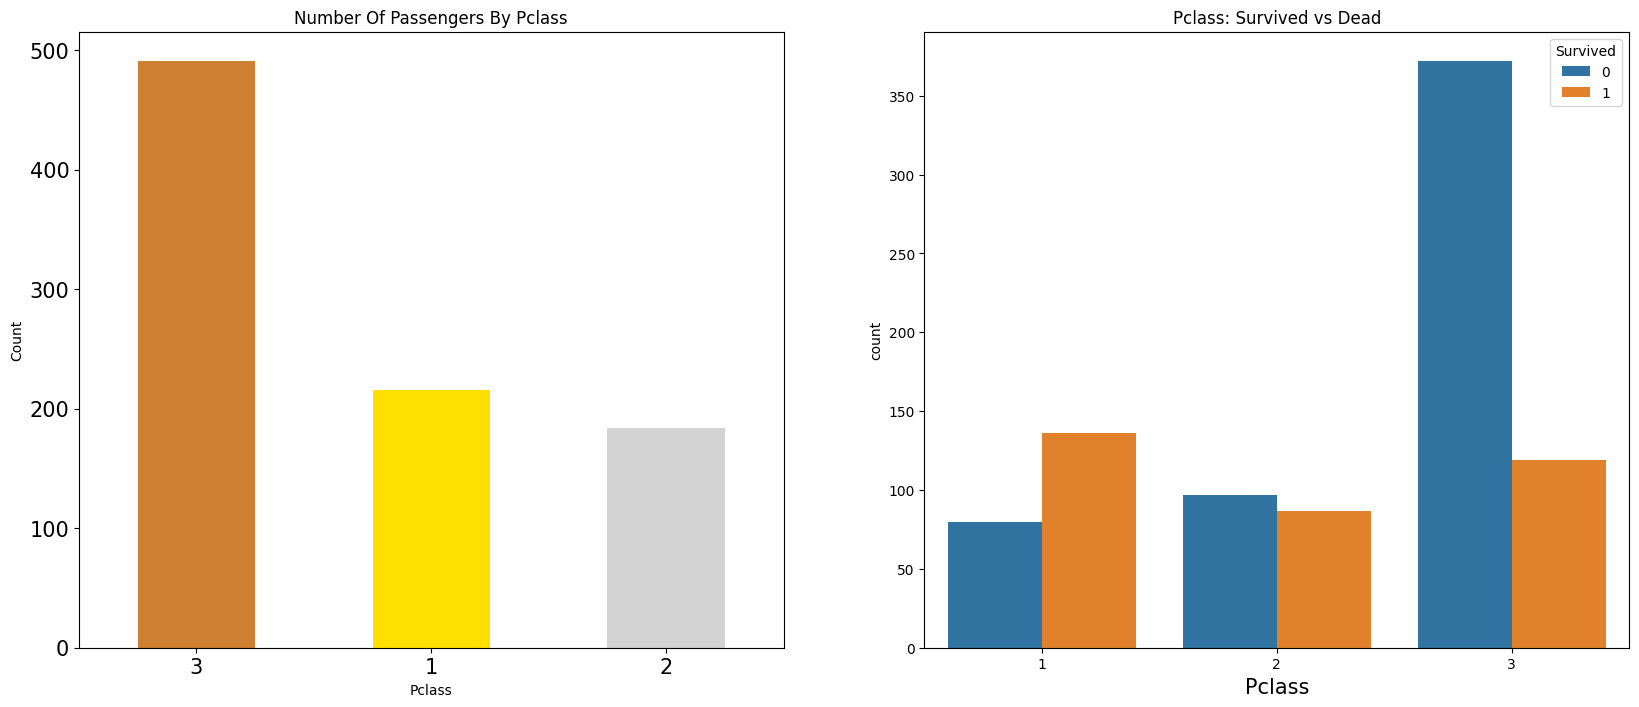

In [79]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Seaborn 설정: 글꼴 크기 설정
# sns.set(font_scale=1)

# 첫 번째 서브플롯: Pclass별 승객 수 막대 그래프
# 'Pclass' 컬럼의 값들을 세어서 막대 그래프로 표현, 색상을 지정
data['Pclass'].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'],  # 막대의 색상 설정
    ax=ax[0], 
    fontsize=15  # 글꼴 크기 설정
)
ax[0].set_title('Number Of Passengers By Pclass') 
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
ax[0].set_ylabel('Count')  # y축 레이블 설정

# 두 번째 서브플롯: Pclass별 생존자와 사망자 수 막대 그래프
# 'Pclass' 컬럼을 기준으로 'Survived'를 색상 구분하여 막대 그래프로 표현
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')  # 차트 제목 설정
ax[1].set_xlabel('Pclass', fontsize=15) # sns.countplot에서는 fontsize를 직접 설정할 수 없음. 
                                        # 대신, Matplotlib의 텍스트 설정 함수를 사용

# 차트 표시
plt.show()


좌측은 각 Pclass에 대해서 승객수를 count한 plot이다. 3,1,2순으로 승객이 많았다. </br>

우측은 각 Pclass에 대해서 사망한 승객수와, 생존한 승객수를 Count한Plot이다. </br> 상대적으로 Pclass = 3에서 생존율이 극적으로 낮았고, Pcalss = 2에서는 생존/사망이 비슷, Pclass = 1에서는 오히려 생존한 경우가 더 많았다. </br>

Pclass가 1, 2, 3 으로 갈수록 생존율이 현저하게 떨어지며, 돈으로 목숨을 산 격이다.

## Sex,Survived와 Pclass의 관계 (가설2)

In [80]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, 
            margins = True).style.background_gradient(cmap = 'summer_r')

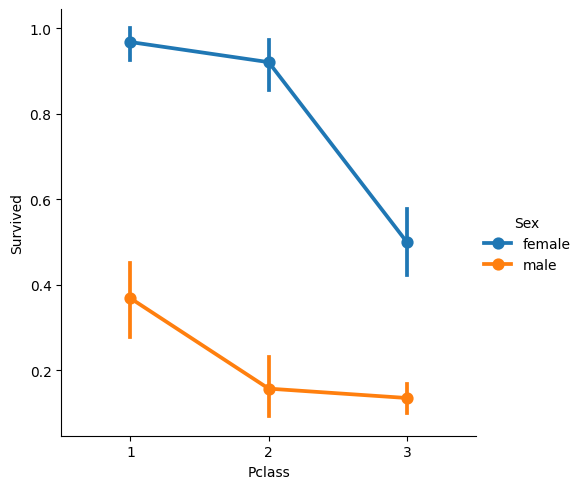

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Catplot 생성: Pclass와 Survived 간의 관계를 성별(Sex)에 따라 구분하여 시각화
sns.catplot(
    x='Pclass',      # x축에 표시할 변수
    y='Survived',    # y축에 표시할 변수
    hue='Sex',       # 성별에 따라 다른 색상을 사용하여 구분
    data=data,       # 사용할 데이터프레임
    kind='point'     # 점 그래프(point plot)로 표시
)

# 플롯 표시
plt.show()


먼저, Pclass와 Survived 모두 Categorical 데이터 이므로 catplot을 이용했다. </br>

위 Plot을 보면, 남 녀 모두 Pclass가 증가함에 따라(하등 객실로 감에따라) 생존할 가능성이 떨어지는 것을 알 수 있다. </br>

특히 여자의경우 더욱 극적이다. </br>

물론 일단 여자의 경우 Lady/Baby First Policy에 의해 남자보다는 생존율이 압도적으로 높다. </br> 

즉, 여자이면서 Pclass = 1에 머물렀을 경우 거의 모두 살아남았다고 할 수 있다. (여자 1등객실 94명중 3명만 사망했다고 한다) </br>

참고로, catplot(categorical plot) 함수는 다양한 그래프 유형을 지원하며, kind 파라미터를 통해 'point', 'bar', 'strip', 'swarm', 'box', 'violin' 등의 그래프를 생성할 수 있습니다.

## Age는 연속형 변수

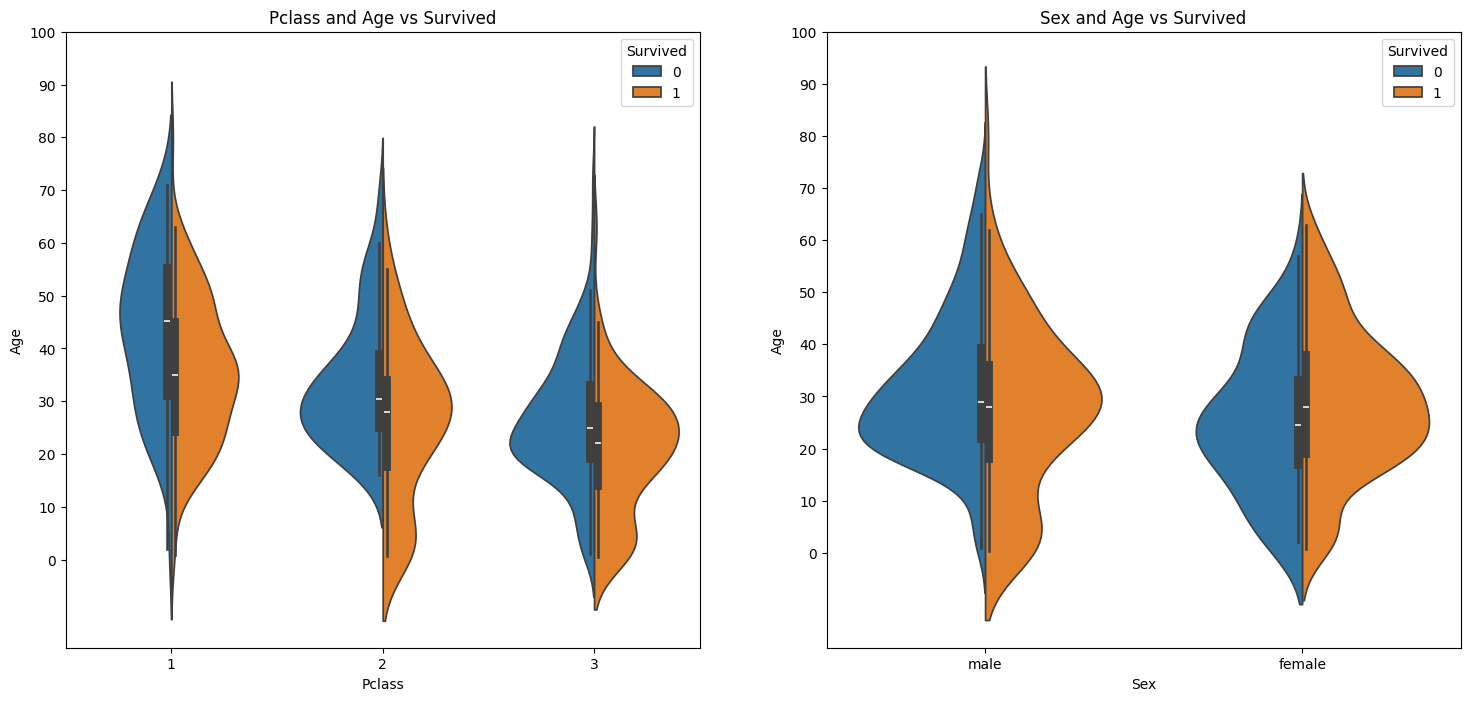

In [82]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 서브플롯: Pclass와 Age에 따른 생존자와 사망자 분포 바이올린 플롯
# 'Pclass'와 'Age'를 기준으로 생존 여부에 따라 데이터를 구분하여 바이올린 플롯을 그림
sns.violinplot(
    x="Pclass",     
    y="Age",        
    hue='Survived', 
    data=data,     
    split=True,     # 바이올린 플롯을 생존 여부에 따라 분할
    ax=ax[0]        
)
ax[0].set_title('Pclass and Age vs Survived')  
ax[0].set_yticks(range(0, 110, 10))  # y축 틱 설정

# 두 번째 서브플롯: Sex와 Age에 따른 생존자와 사망자 분포 바이올린 플롯
# 'Sex'와 'Age'를 기준으로 생존 여부에 따라 데이터를 구분하여 바이올린 플롯을 그림
sns.violinplot(
    x='Sex',       
    y="Age",       
    hue="Survived",
    data=data,     
    split=True,    
    ax=ax[1]       
)
ax[1].set_title('Sex and Age vs Survived')  
ax[1].set_yticks(range(0, 110, 10))  # y축 틱 설정

# 차트 표시
plt.show()


Pclass, Survived, Sex는 범주형, Age는 연속형 변수이라서 Violin Plot형태로 표현하면 좋다. </br>

좌측에서 Pclass = 1일때는 생존자 연령평균이 사망자 연령 평균보다 낮다는 것을 알 수 있다. </br>

Pclass =1 인 경우를 제외하고는 모두 평균은 비슷하게 분포하는데, 대신 영유아의 경우 생존을 좀 더 잘했다고 할 수 있겠다. (분포가 정규분포 모양이 아닌 영유아 층에서 살짝 봉우리가 있음) </br>

우측도 마찬가지로 영유아가 생존하는데 유리했다고 할 수 있겠다. 
평균은 비슷하게 분포하나 여성남성 모두의 경우 생존자의 연령 평균이 약간 더 높다고 할 수 있다. </br>

## Age와 Survived의 관계 (가설3)

Age연속 변수의 null 값을 처리했으니 생존여부별 Age의 분포를 한번 보자

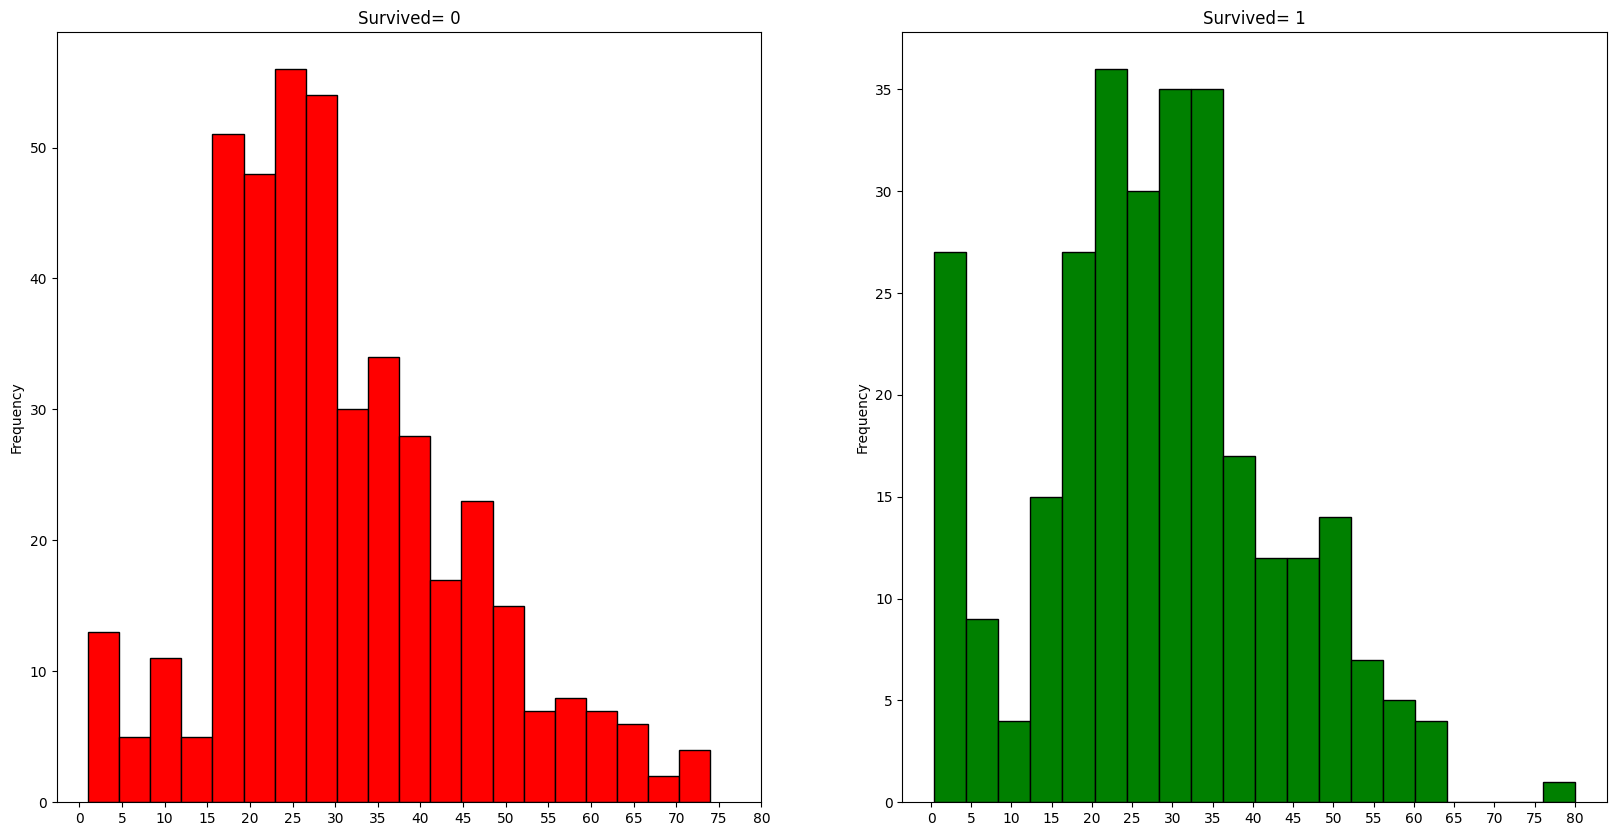

In [83]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 첫 번째 서브플롯: 생존하지 못한 승객들의 나이 분포 히스토그램
data[data['Survived'] == 0].Age.plot.hist(
    ax=ax[0],                 
    bins=20,                  # 히스토그램의 빈 수 설정 # 히스토그램에서 데이터가 나누어지는 구간의 수를 결정
    edgecolor='black',        # 막대 테두리 색상 설정
    color='red'               # 막대 색상 설정
)
ax[0].set_title('Survived= 0')  # 첫 번째 서브플롯 제목 설정
x1 = list(range(0, 85, 5))      # x축 틱 설정을 위한 범위 생성
ax[0].set_xticks(x1)            # 첫 번째 서브플롯의 x축 틱(그래프의 x축에 표시되는 눈금) 설정

# 두 번째 서브플롯: 생존한 승객들의 나이 분포 히스토그램
data[data['Survived'] == 1].Age.plot.hist(
    ax=ax[1],                 
    color='green',            
    bins=20,                  
    edgecolor='black'         
)
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))      
ax[1].set_xticks(x2)         

# 플롯 표시
plt.show()


생존/사망 여부에 Frequency로 나타냈기때문에 20-40대 에서 분포가 비슷하다 할 수 있지만, </br>
영유아의 경우 생존할 가능성이 더 높았던것은 확실하다. </br>

## Embarked는 명목형 변수

In [84]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

Embarked, Pclass vs Sex, Survived Crosstable이다. 
Embarked = S에서 사망했을 확률이 조금 높아보인다.

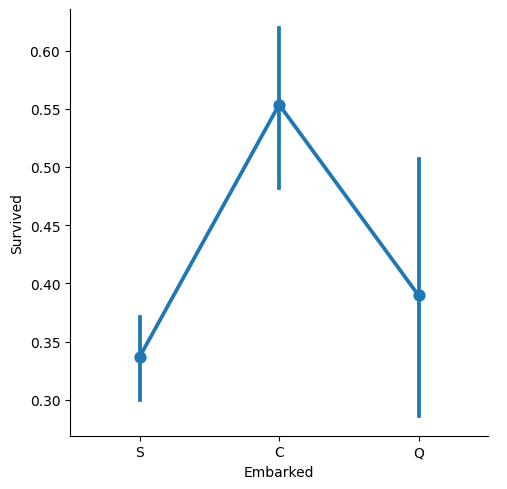

In [85]:
sns.catplot(x = 'Embarked', y = 'Survived', data = data, kind = 'point')
plt.show()

Crosstable에서 예측했듯이, Embarked = S에서 생존율이 확실히 낮았다, 다음은 Q, C순이다.

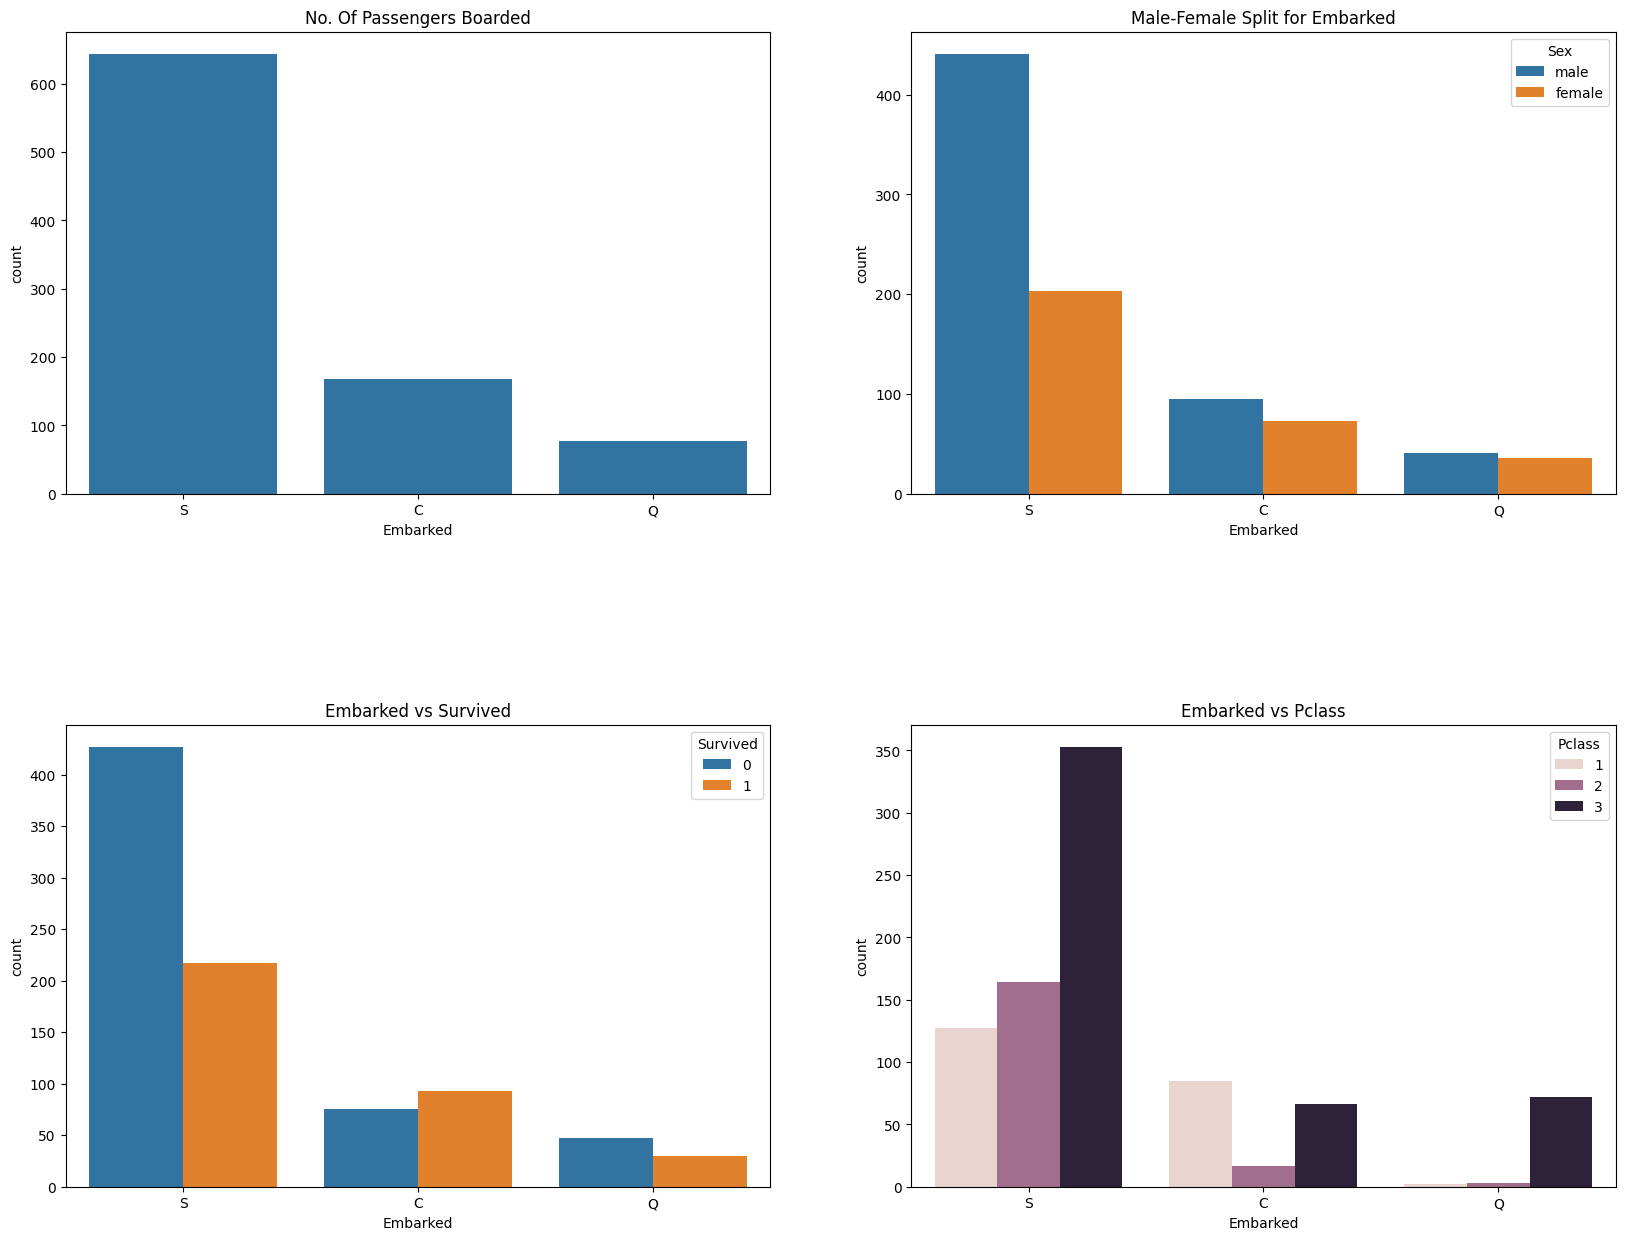

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 첫 번째 서브플롯: 탑승한 승객 수를 표시하는 막대 그래프
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

# 두 번째 서브플롯: 성별에 따른 탑승한 승객 수를 표시하는 막대 그래프
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')

# 세 번째 서브플롯: 생존 여부에 따른 탑승한 승객 수를 표시하는 막대 그래프
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')

# 네 번째 서브플롯: 탑승 클래스에 따른 탑승한 승객 수를 표시하는 막대 그래프
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')

# 서브플롯 간의 간격을 조정
plt.subplots_adjust(
    wspace=0.2,  # 서브플롯 간의 너비 간격 설정 (기본값보다 넓게 설정)
    hspace=0.5  # 서브플롯 간의 높이 간격 설정 (기본값보다 넓게 설정)
)

plt.show()


Embarked와 각 설명변수와의 관계를 살펴보자.

 

- 먼저, C < Q < S 순서로 승객이 많았다. 
- C> Q > S 순으로 생존자가 많았다. 
- 남녀 비율은 세 군데의 탑승지에서 모두 마찬가지로 남성이 더 많은 양상을 띄고있지만 S가 압도적으로 많은 남성이 탑승한 탑승지였다.

- S탑승지의 대부분은 Pclass = 3에 있었다, 즉, S에서 탑승한 사람들의 생존율이 낮은것은, Pclass = 3이었던 것과 관련이 깊어 보인다.

- C탑승지에서 탑승한 승객은 Pclass = 1,2가 Pclass = 3보다 많이 있었다. 이는 C에서 탑승한 승객들의 생존율이 높은것과 깊은 관련이 있어보인다.

- 많은수의 Rich people(Pclass = 1)이 S에서 탑승했지만 생존율이 낮은 이유는 마찬가지로 Poor people(Pclass = 3)도 많이 탑승 했기 때문, Pclass = 3의 생존율은 19%였다.

## SibSp는 이산형 변수!

In [87]:
pd.crosstab(data.SibSp, data.Survived, margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [88]:
# 교차표 생성: SibSp와 Survived에 따른 빈도수 계산
crosstab = pd.crosstab(data['SibSp'], data['Survived'], margins=True, margins_name="Total")

# 생존율 비율 계산 및 소수점 둘째자리에서 반올림
crosstab['Survival Rate'] = (crosstab[1] / crosstab['Total']).round(2)

# 스타일 설정: 배경 색상을 'summer_r' 컬러 맵으로 설정하여 그라데이션 적용
styled_crosstab = crosstab.style.background_gradient(cmap='summer_r').format({'Survival Rate': '{:.2f}'})

# 결과 출력
styled_crosstab

Survived,0,1,Total,Survival Rate
SibSp,,,,
0,398,210,608,0.35
1,97,112,209,0.54
2,15,13,28,0.46
3,12,4,16,0.25
4,15,3,18,0.17
5,5,0,5,0.00
8,7,0,7,0.00
Total,549,342,891,0.38


참고로, 포맷 문자열에 대한 설명입니다.

{}: 기본적인 포맷팅 구문을 감싸는 괄호입니다. </br>
:: 포맷 명령이 시작됨을 알리는 구분자입니다. </br>
.2f: 숫자를 소수점 둘째 자리까지 표시하는 형식입니다. </br>
.: 소수점 이하 자릿수 표시를 시작합니다. </br>
2: 소수점 이하 두 자리까지 표시하겠다는 의미입니다. </br>
f: 부동 소수점 형식을 사용하여 숫자를 포맷팅합니다. </br>

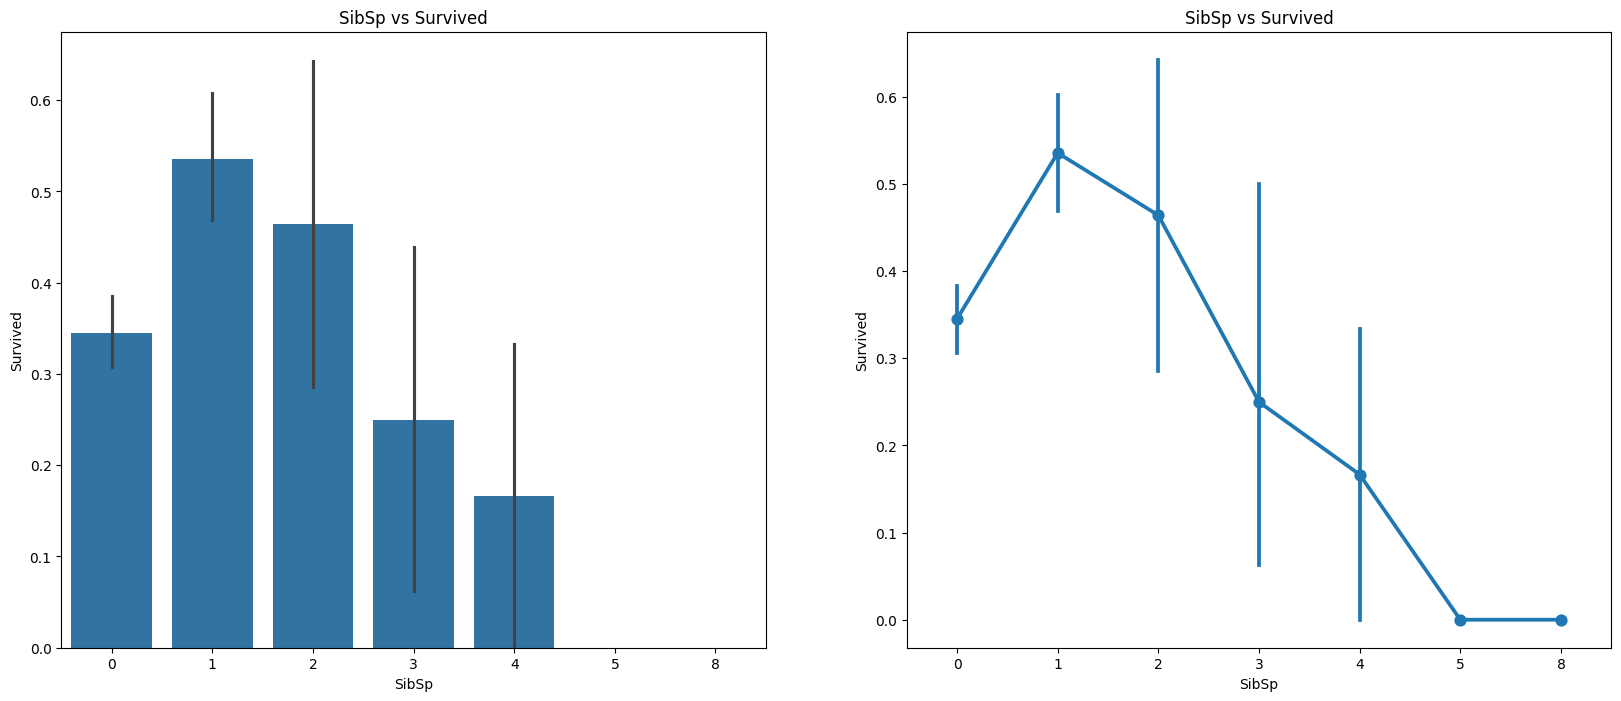

In [89]:
f, ax = plt.subplots(1,2,figsize = (20, 8))

sns.barplot(x= 'SibSp', y='Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot(x='SibSp', y='Survived', data= data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

놀랍게도 SibSp(형제자매/배우자)이 없는 사람들은 34.5%정도의 생존율을 보였지만 형제 자매가 있으면 생존율이 올라갔다.

그런데 5-8명의 동반을 가진 사람들은 왜 모두 살아남지 못했는가? 이들은 모두 Pclass = 3이었다.

## Parch도 이산형 변수!

In [90]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [91]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


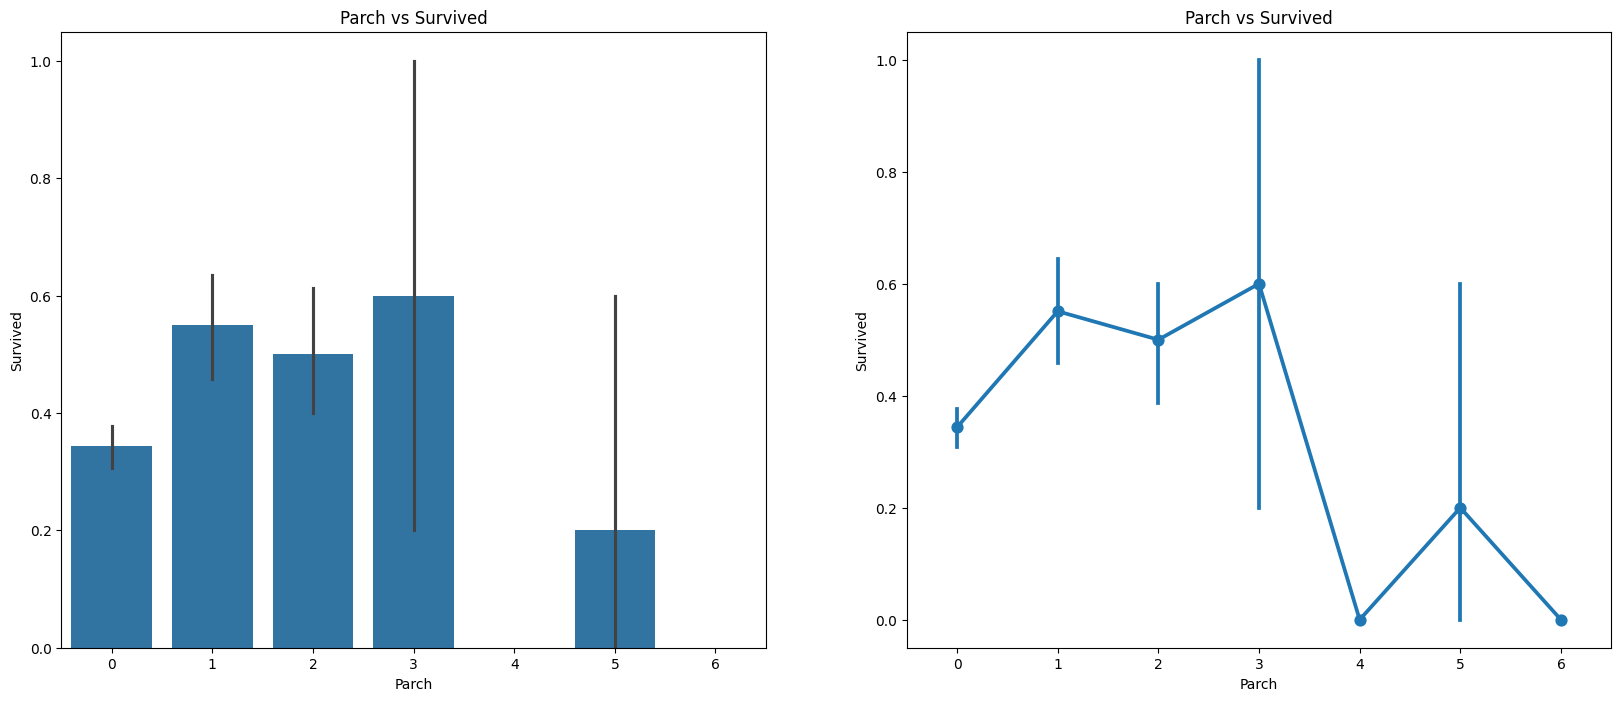

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

Parch(부모, 자식 수 ) 또한 생존에 영향을 미쳤다고 할 수 있다.

## Fare은 연속형 변수!

In [93]:
print(f'Highest Fare was: {data["Fare"].max():.2f}')
print(f'Lowest Fare was: {data["Fare"].min():.2f}')
print(f'Average Fare was: {data["Fare"].mean():.2f}')

Highest Fare was: 512.33
Lowest Fare was: 0.00
Average Fare was: 32.20


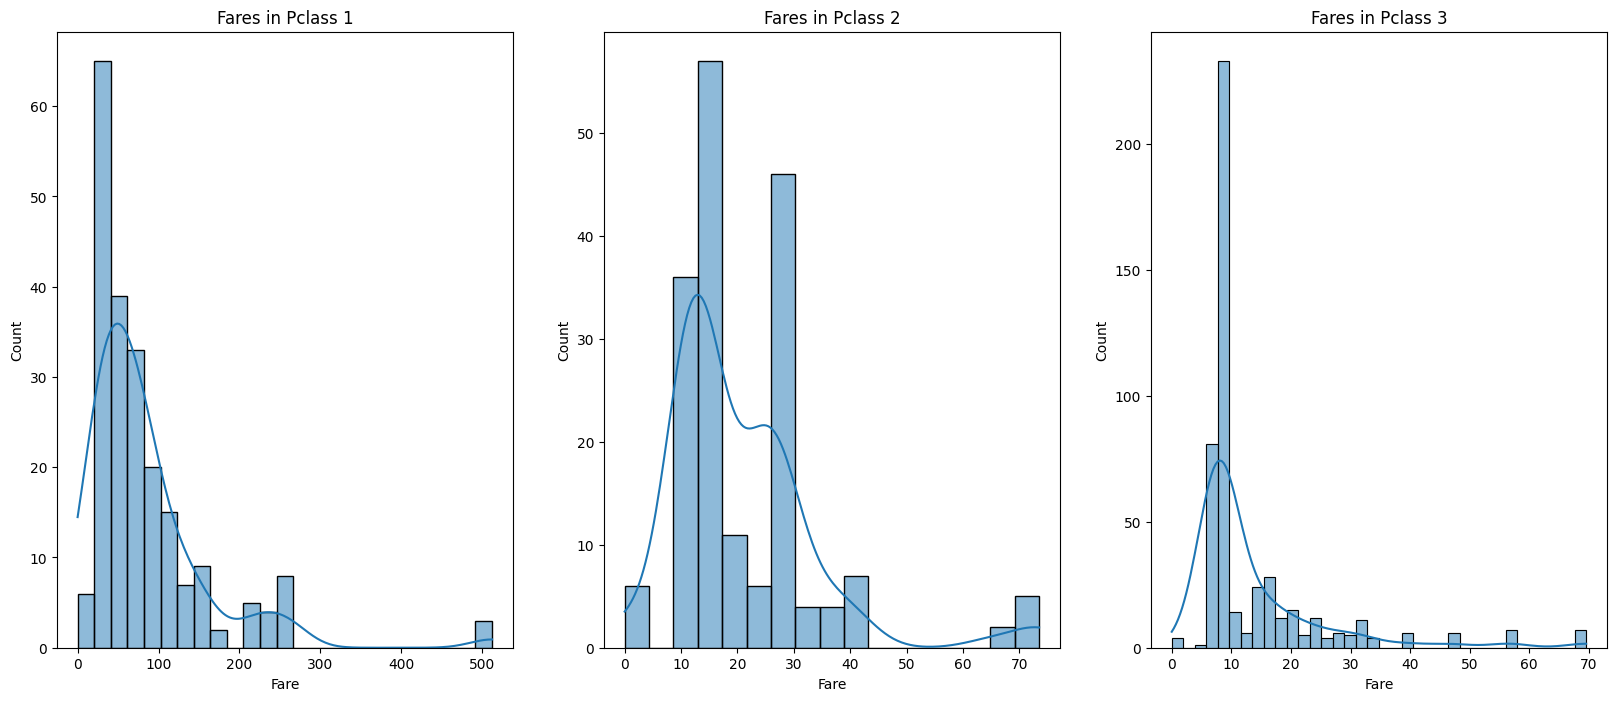

In [94]:
f,ax=plt.subplots(1,3,figsize=(20,8))

# Pclass 1의 요금 분포를 히스토그램으로 표시
sns.histplot(data[data['Pclass'] == 1].Fare, ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')

# Pclass 2의 요금 분포를 히스토그램으로 표시
sns.histplot(data[data['Pclass'] == 2].Fare, ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')

# Pclass 3의 요금 분포를 히스토그램으로 표시
sns.histplot(data[data['Pclass'] == 3].Fare, ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass = 1의 운임은 대체로 20 이상으로 많이 분포하고 있고 500까지 범위가 굉장히 넓다. (비싸게 주고 탄사람도 많음) </br>
Pclass = 2의 운임은 쌍봉형태인데, 10, 30 정도에서 쌍봉을 이루고 있다. </br>
Pclass = 3의 운임도 의외로 비싸게 주고 탄 사람도 있었는데 대체로 10정도의 운임을 많이 냈다.  </br>

참고로 ked(Kernel Density Estimation)란 커널 밀도 추정을 말한다. </br>
데이터의 분포를 추정하는 비모수적인 방법으로, 데이터의 히스토그램을 부드럽게 하여 데이터의 전체 분포를 시각화하는 데 사용된다. </br>


## Fare와 Survived의 관계 (가설4)

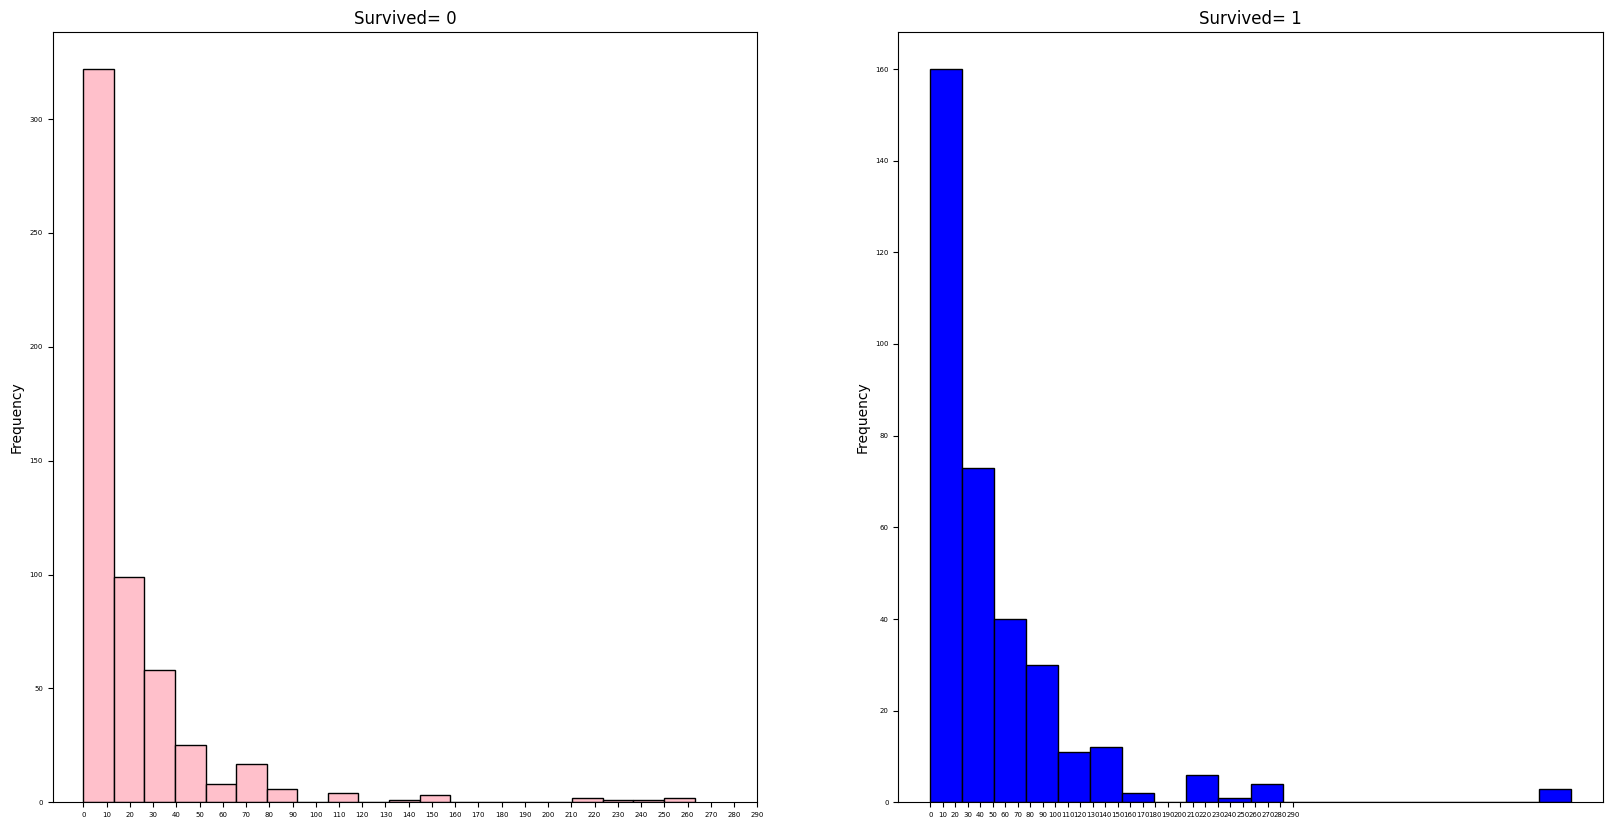

In [95]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 첫 번째 서브플롯: 생존하지 못한 승객들의 요금 분포 히스토그램
data[data['Survived'] == 0].Fare.plot.hist(
    ax=ax[0],                 
    bins=20,                  # 히스토그램의 빈 수 설정 # 히스토그램에서 데이터가 나누어지는 구간의 수를 결정
    edgecolor='black',        # 막대 테두리 색상 설정
    color='pink',               # 막대 색상 설정
    fontsize=5  # 글꼴 크기 설정
)
ax[0].set_title('Survived= 0')  # 첫 번째 서브플롯 제목 설정
x1 = list(range(0, 300, 10))      # x축 틱 설정을 위한 범위 생성
ax[0].set_xticks(x1)            # 첫 번째 서브플롯의 x축 틱(그래프의 x축에 표시되는 눈금) 설정

# 두 번째 서브플롯: 생존한 승객들의 요금 분포 히스토그램
data[data['Survived'] == 1].Fare.plot.hist(
    ax=ax[1],                           
    bins=20,                  
    edgecolor='black',        
    color='blue',   
    fontsize=5  # 글꼴 크기 설정
)
ax[1].set_title('Survived= 1')
x2 = list(range(0, 300, 10))      
ax[1].set_xticks(x2)         

# 플롯 표시
plt.show()


Fare의 요금을 상대적으로 적게 낸 사람들 중 생존 한사람과 그렇지 못한 사람을 비교했을 때 큰 차이는 없었다. </br>
Fare 요금의 130-160 구간, 210-280 까지의 비율 중에서는 요금을 비싸게 지불한 사람이 산 비율이 좀 더 많아 보인다. </br>

## EDA 결과 정리

- Sex: 남성에 비해 여성의 생존율은 매우 높았다.

- Pclass: 일등석 승객이 되면 생존율이 높아지고, 삼등석은 생존율이 매우 낮았다. 

- Age: 영유아일 수록 생존 확률이 높았다, 15-35세사이의 승객이 많이 죽었다.

- Embarked: Pclass1의 상당수가 S, Q에서 탑승했음에도 불구하고 C에서의 생존율이 높았다.

- Parch + SibSp : 대가족이 혼자 여행하는 사람들보다 생존율이 올라갔다.

- Fare : 요금을 많이 지불한 사람일수록, 생존율이 높았다.

## Correlation Plot

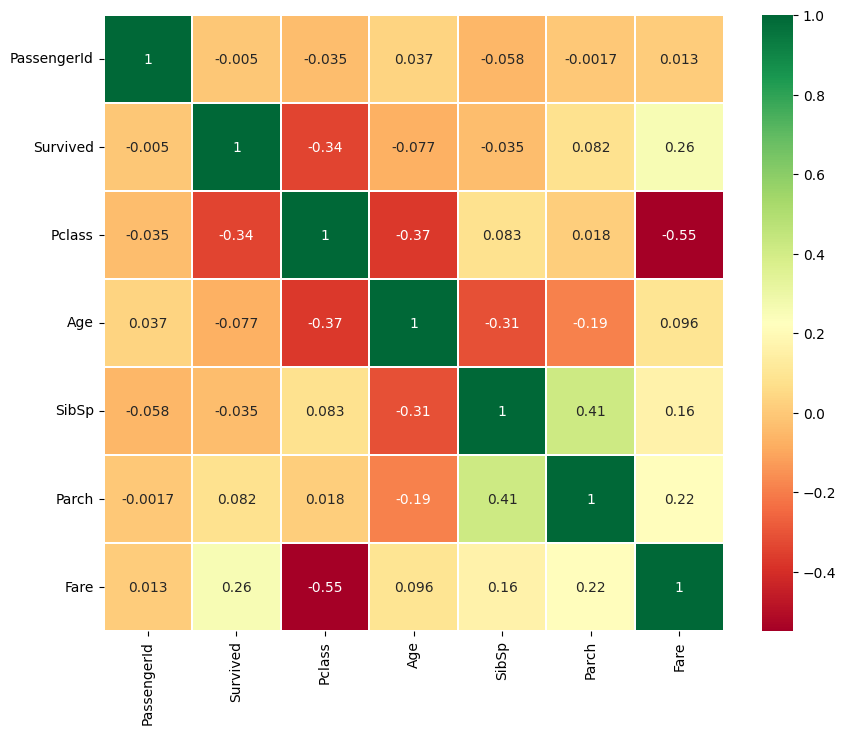

In [97]:
# 숫자형 데이터만 선택하여 상관 행렬 계산
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 히트맵 생성: 상관 행렬을 시각화하고, 상관 계수 값을 표시
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
# numeric_data.corr() --> 상관 행렬을 계산
# annot=True --> 각 셀에 상관 계수 값을 표시 (annotation: 주석)
# cmap='RdYlGn' --> 색상 맵을 'Red-Yellow-Green'으로 설정
# linewidths=0.2 --> 셀 사이의 경계선 두께를 설정

# 현재 플롯의 Figure 객체 가져오기 
fig = plt.gcf() # get current figure

# Figure 크기 설정 (10인치 x 8인치)
fig.set_size_inches(10, 8)

# 그래프 저장
plt.savefig('./result_image/1st_correlation_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()
